In [1]:
import collections

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
def get_degree_degree_corr(network: int):
  filepath = f'data/{network}/edgelist.pkl'
  G = nx.from_pandas_edgelist(
    pd.read_pickle(filepath)[['source', 'target', 'datetime']], 
    create_using=nx.MultiGraph, edge_attr=True
  )
  result = collections.defaultdict(list)
  for node, degree in G.degree():
    result[degree].append(np.mean([G.degree(neighbor) for neighbor in G[node]]))
  endresult = dict()
  for degree, avg_neighbor_degree in result.items():
    endresult[degree] = np.mean(avg_neighbor_degree)
  pd.Series(endresult).sort_index().plot(label=network)
  plt.legend()

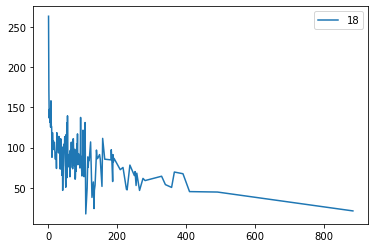

In [3]:
get_degree_degree_corr(18)

In [ ]:
get_degree_degree_corr(10)